In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import random
import time

In [2]:
#找到触电点之后的数据为训练数据
def create_data(csv_id1,csv_id2):
    Data_train = []
    #找触电点步长
    point_find_step = 10
    count = 0
    threshold = 0.10
    for i in range(csv_id1,csv_id2):
        csv_data = pd.read_csv(open('D:/学习/DataScience/experimrnt/indirect/'+str(i)+'.csv'),
                  usecols=[1,2,5,6])
        csv_data = np.array(csv_data)
    #从触电点开始判断,找到大概开始变化的位置前
        left, right = 0, len(csv_data) - 1
        while left < right:
            if abs(csv_data[left,2]) > threshold:
                break
            left = left + point_find_step
        while right > left:
            if abs(csv_data[right,2]) > threshold:
                break
            right = right - point_find_step
        if left > 0:
            left = left - point_find_step//2
        if right < len(csv_data) - 1:
            left = left + point_find_step//2
        Data_train.extend(csv_data[left:right+1])
        count = count + right - left + 1
    Data_train = np.array(Data_train)
    print('len_all_data =',len(Data_train))
    Data_train = Data_train.reshape(count,4)
    return Data_train

#提取一个cvs中所有数据
def get_one_csv(cvs_id):
    csv_data = pd.read_csv(open('D:/学习/DataScience/experimrnt/indirect/'+str(cvs_id)+'.csv'),
              usecols=[1,2,5,6])
    csv_data = np.array(csv_data)
    return csv_data

In [3]:
#输出，训练集大小，测试集大小，平均损失，训练时间
def evaluate(estimator, data_first, data_last, isNormalized = 1):
    print('csv'+str(data_first)+'---csv'+str(data_last))
    X = create_data(data_first, data_last)
#     print(len(X))
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    X_train, X_test, y_train, y_test = train_test_split(X[:,[1,3]],X[:,2], test_size=0.25)
    time_start = time.clock()
    estimator.fit(X_train.reshape(-1,2),y_train)
    y_predict = estimator.predict(X_test.reshape(-1,2))
    time_end = time.clock()
    #计算平均损失
    cost = 5000*sum((y_predict - y_test)**2)/len(X_test)
    print('len_X_train =',len(X_train))
    print('len_X_test =',len(X_test))
    print('loss =',cost)
    print('score =',estimator.score(X_test, y_test))
    print('time cost = %s s'%(time_end-time_start))

def test_one_csv(estimator, csv_id, isNormalized = 0):
    X = create_data(csv_id, csv_id+1)
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    y = estimator.predict(X[:,[1,3]])
    loss = 0.5*sum((y - X[:,2])**2)
    print('loss =',loss)
    # plt.plot(X[:,0],X[:,1],label='X')
    plt.plot(X[:,0],X[:,2],label='Y')
    plt.plot(X[:,0],y,label='Y_predict')
    plt.legend()

In [4]:
data_id = random.randint(51,60)
print(data_id)

60


csv1---csv51
len_all_data = 99955
len_X_train = 74966
len_X_test = 24989
loss = 344.6480927631282
score = 0.9181782640850104
time cost = 475.27520686604134 s
len_all_data = 1995
loss = 64.28357944978582


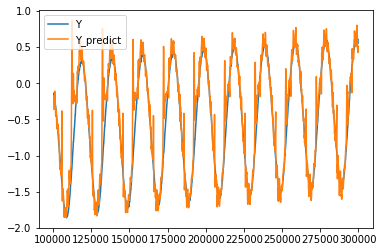

In [6]:
#支持向量机回归
svr1 = SVR(kernel='rbf')
evaluate(svr1, 1, 51, isNormalized = 0)
test_one_csv(svr1, data_id, isNormalized = 0)

csv1---csv51
len_all_data = 99955
len_X_train = 74966
len_X_test = 24989
loss = 520.4718146285313
score = 0.8783485284459731
time cost = 0.24583330383984503 s
len_all_data = 1995
loss = 114.01561447767509


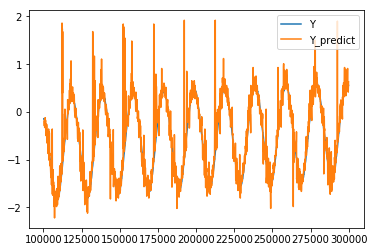

In [7]:
#决策树回归
dtr = DecisionTreeRegressor()
evaluate(dtr, 1, 51, isNormalized = 0)
test_one_csv(dtr, data_id, isNormalized = 0)

csv1---csv110
len_all_data = 217715
len_X_train = 163286
len_X_test = 54429
loss = 586.368274176
score = 0.860662170489
time cost = 0.4777800625233808 s
len_all_data = 1995
loss = 126.00914976


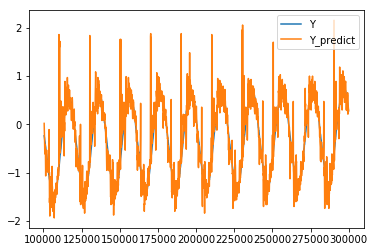

In [5]:
#决策树回归
dtr = DecisionTreeRegressor()
evaluate(dtr, 1, 110, isNormalized = 0)
test_one_csv(dtr, 112, isNormalized = 0)

csv1---csv51
len_all_data = 99955
len_X_train = 74966
len_X_test = 24989
loss = 2430.678917201361
score = 0.4302449920245568
time cost = 0.008530879490535881 s
len_all_data = 1995
loss = 531.1566840412439


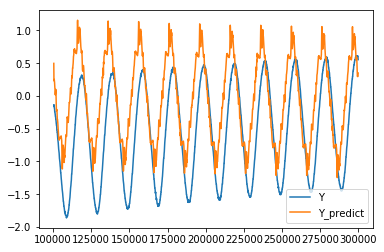

In [8]:
#线性回归
lr = LinearRegression()
evaluate(lr, 1, 51, isNormalized = 0)
test_one_csv(lr, data_id, isNormalized = 0)

csv1---csv51
len_all_data = 99955
len_X_train = 74966
len_X_test = 24989
loss = 341.75270268639446
score = 0.91812715359837
time cost = 4.910400283135914 s
len_all_data = 1995
loss = 85.5191023507395


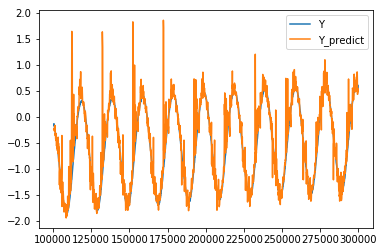

In [9]:
#随机森林
rfr = RandomForestRegressor(n_estimators=30)
evaluate(rfr,1,51,isNormalized = 0)
test_one_csv(rfr, data_id, isNormalized = 0)

csv1---csv51
len_all_data = 99955
len_X_train = 74966
len_X_test = 24989
loss = 2813.48150856
score = 0.331005816244
time cost = 1.9428682255868353 s
len_all_data = 1985
loss = 657.678473353


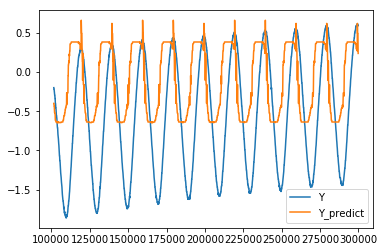

In [6]:
#adaboost
adbr = AdaBoostRegressor(n_estimators=100)
evaluate(adbr,1,51,isNormalized = 0)
test_one_csv(adbr, data_id, isNormalized = 0)

csv1---csv51
len_all_data = 99955
len_X_train = 74966
len_X_test = 24989
loss = 1239.3615720200935
score = 0.7058432830430799
time cost = 1.6671169704477506 s
len_all_data = 1995
loss = 285.7944883760936


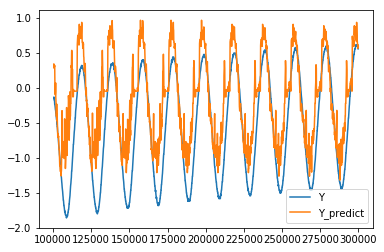

In [16]:
#GBRT梯度提升回归树
gbrt = GradientBoostingRegressor()
evaluate(gbrt,1,51,isNormalized = 0)
test_one_csv(gbrt, data_id, isNormalized = 0)

csv1---csv51
len_all_data = 99955
len_X_train = 74966
len_X_test = 24989
loss = 299.7167081916044
score = 0.9291453276758856
time cost = 0.17518704654048634 s
len_all_data = 1995
loss = 88.15318950000062


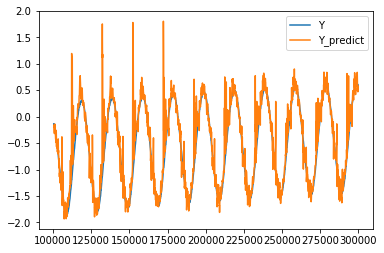

In [19]:
#KNN
knn = KNeighborsRegressor()
evaluate(knn,1,51,isNormalized = 0)
test_one_csv(knn, data_id, isNormalized = 0)

In [ ]:
# svr2 = SVR(kernel='linear')
# print('svr,linear,数据归一,前100- - - - - - - - - - - - - - - - - - - - - - - ')
# evaluate(svr2, 1, 101, isNormalized = 1)

# svr2 = SVR(kernel='rbf')
# evaluate(svr2, 15, 30, isNormalized = 1)

In [ ]:
# svr3 = GridSearchCV(SVR(kernel='rbf', C = 10, gamma = 0.3), cv=3,  
#                    param_grid={"C": [1, 10, 20],  
#                                "gamma": np.logspace(--2, 2, 3)})  
# evaluate(svr3, 15, 30, isNormalized = 0)